# Unit 5 - Financial Planning

### NOTES
* Registration is Alpaca is not allowed for Canada as country of residence and taxation. Hence, per the direction from Professor Sasanka Panda I have refered to the historical stock data from Yahoo Finance for this assignment.
* Yahoo Finance doesn't require any keys so environment variable file is not required either to be uploaded and set up.
* Installed Yahoo Finance by running the command "pip install yfinance" at the terminal
* Installed Alpaca Trade API package by running the command "pip install alpaca-trade-api" in the terminal window. This is required since the MCForecastTools uses Alpaca internally.

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
import yfinance as yahooFinance
import datetime
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [2]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [3]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [4]:
# Execute `GET` request with url
response_btc_data = requests.get(btc_url)
response_eth_data = requests.get(eth_url)

In [5]:
# Format data as JSON
btc_data = response_btc_data.json()
eth_data = response_eth_data.json()

# Use json.dumps with argument indent=4 to format data
print("BTC data \n"+json.dumps(btc_data, indent=4)+"\n\n")
print("ETH data \n"+json.dumps(eth_data, indent=4))

BTC data 
{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19238987,
            "total_supply": 19238987,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 16845.5,
                    "volume_24h": 26417696970,
                    "market_cap": 324020696930,
                    "percentage_change_1h": -0.484779464580895,
                    "percentage_change_24h": 1.30326707362407,
                    "percentage_change_7d": -1.94472108384799,
                    "percent_change_1h": -0.484779464580895,
                    "percent_change_24h": 1.30326707362407,
                    "percent_change_7d": -1.94472108384799
                },
                "CAD": {
                    "price": 22884.61175,
                    "volume_24h": 35888441333.745,
         

In [6]:
# Fetch current BTC price
btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27461.53
The current value of your 5.3 ETH is $8733.59


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Format start date and end date for downloading the stocks data from Yahoo Finance
# Set start and end dates of one year for gathering the historical data of the stocks from Yahoo Finance
start_date = datetime.datetime(2020, 5, 1)
end_date = datetime.datetime(2021, 5, 1)

In [9]:
# Gather the historical data from Yahoo Finance. Store the data into seperate DataFrame for the respective ticker SPY and AGG, for a period of last 1 year.
SPY_df = yahooFinance.download("SPY", start = start_date, end = end_date)
AGG_df = yahooFinance.download("AGG", start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
# Display few sample rows of the AGG DataFrame
AGG_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-01,116.970001,117.099998,116.680000,116.870003,110.766533,6099500
2020-05-04,116.889999,117.089996,116.870003,116.970001,110.861267,3684100
2020-05-05,116.959999,116.970001,116.809998,116.879997,110.776001,4611500
2020-05-06,116.440002,116.709999,116.300003,116.410004,110.330536,6394900
2020-05-07,116.610001,116.769997,116.419998,116.769997,110.671745,3786700


In [11]:
# Display few sample rows of the SPY DataFrame
SPY_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-01,285.309998,290.660004,281.519989,282.790009,271.165741,125180000
2020-05-04,280.739990,283.899994,279.130005,283.570007,271.913696,80873200
2020-05-05,286.640015,289.250000,283.709991,286.190002,274.425934,79569900
2020-05-06,288.040009,288.459991,283.779999,284.250000,272.565735,73632600
2020-05-07,287.750000,289.779999,287.130005,287.679993,275.854706,75250400


In [12]:
# Reorganize the DataFrames

# Drop the column of Adj Close from the DataFrame, since the Closing value will be used for our analysis and simulation.
AGG_df = AGG_df.drop(columns = "Adj Close").copy()
SPY_df = SPY_df.drop(columns = "Adj Close").copy()

# Rename the column headers of the respective Ticker Dataframes from Camelcasing to all small letter. 
SPY_df.rename(columns = {'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)
AGG_df.rename(columns = {'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

In [13]:
# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG_df, SPY_df ],axis=1, keys=["AGG", "SPY"])
# Preview DataFrame
df_ticker.head()

AGG                                               \
                  open        high         low       close   volume   
Date                                                                  
2020-05-01  116.970001  117.099998  116.680000  116.870003  6099500   
2020-05-04  116.889999  117.089996  116.870003  116.970001  3684100   
2020-05-05  116.959999  116.970001  116.809998  116.879997  4611500   
2020-05-06  116.440002  116.709999  116.300003  116.410004  6394900   
2020-05-07  116.610001  116.769997  116.419998  116.769997  3786700   

                   SPY                                                 
                  open        high         low       close     volume  
Date                                                                   
2020-05-01  285.309998  290.660004  281.519989  282.790009  125180000  
2020-05-04  280.739990  283.899994  279.130005  283.570007   80873200  
2020-05-05  286.640015  289.250000  283.709991  286.190002   79569900  
2020-05-06  288.040009  288.459991  283.779999  284.250000   73632600  
2020-05-07  287.750000  289.779999  287.130005  287.679993   75250400

### Create a new DataFrame and store the closing prices of each stock

In [14]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

In [15]:
# Pick AGG and SPY close prices into the new Data Frame
df_closing_prices["AGG"] = df_ticker["AGG"]["close"]
df_closing_prices["SPY"] = df_ticker["SPY"]["close"]

In [16]:
# Display few sample rows of the DataFrame
df_closing_prices.head()

,AGG,SPY
Date,,
2020-05-01,116.870003,282.790009
2020-05-04,116.970001,283.570007
2020-05-05,116.879997,286.190002
2020-05-06,116.410004,284.250000
2020-05-07,116.769997,287.679993


### Compute the value in dollars of the current amount of shares and print the results

In [17]:
# Pick AGG current day's close price. This will be the closing price of the last record of the Data Frame.
agg_close_price = df_closing_prices["AGG"][0]
# Pick SPY current day's close price
spy_close_price = df_closing_prices["SPY"][0]
# Print AGG and SPY close prices. This will be the closing price of the last record of the Data Frame.
print(f"Current AGG closing price: ${agg_close_price:0.2f}")
print(f"Current SPY closing price: ${spy_close_price:0.2f}")

Current AGG closing price: $116.87
Current SPY closing price: $282.79


In [18]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14139.50
The current value of your 200 AGG shares is $23374.00


### Savings Health Analysis

In [19]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_savings = my_btc_value + my_btc_value
shares_savings = my_spy_value + my_agg_value

# Create savings DataFrame
# Set the investment types
inv_type = ["crypto", "shares"]

# Set current amount of investment
inv_savings = {
    "amount" : [crypto_savings, shares_savings]
}
# Create the shares DataFrame with `tickers` as index
df_savings = pd.DataFrame(inv_savings, index=inv_type)

# Display savings DataFrame
display(df_savings)

,amount
crypto,54923.068200
shares,37513.500977


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

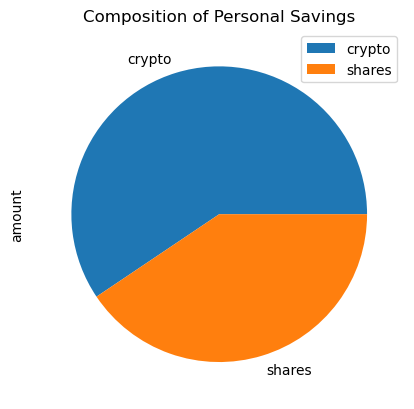

In [20]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [21]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_savings + shares_savings

# Validate saving health
if total_savings > emergency_fund :
    print(f"Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund :
    print(f"Congratulations! You have reached your financial goal of your emergency fund.")
elif total_savings < emergency_fund :
    diff = emergency_fund - total_savings
    print(f"You are ${diff:0.2f} away from reaching your financial goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [22]:
# Set start and end dates of five years for gathering the historical data of the stocks from Yahoo Finance
# Sample results may vary from the solution based on the time frame chosen
start_date_5y = datetime.datetime(2016, 5, 1)
end_date_5y = datetime.datetime(2021, 5, 1)

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
# Download the historical data from Yahoo Finance and store the data into seperate DataFrame for the respective ticker SPY and AGG, of last 5 years.
SPY_df_5y = yahooFinance.download("SPY", start = start_date_5y, end = end_date_5y)
AGG_df_5y = yahooFinance.download("AGG", start = start_date_5y, end = end_date_5y)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [24]:
# Display few sample rows of the AGG DataFrame
AGG_df_5y.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-05-02,110.739998,110.739998,110.519997,110.610001,94.462677,3553900
2016-05-03,110.889999,110.949997,110.750000,110.809998,94.633492,3044900
2016-05-04,110.910004,110.930000,110.760002,110.860001,94.676163,2920200
2016-05-05,110.919998,111.160004,110.800003,111.139999,94.915283,3008100
2016-05-06,111.120003,111.120003,110.970001,110.970001,94.770119,2718500


In [25]:
# Display few sample rows of the SPY DataFrame
SPY_df_5y.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-05-02,206.919998,208.179993,206.410004,207.970001,184.310898,62188000
2016-05-03,206.520004,206.800003,205.279999,206.160004,182.706818,106422100
2016-05-04,204.990005,205.850006,204.419998,205.009995,181.687576,92243800
2016-05-05,205.559998,205.979996,204.470001,204.970001,181.652145,67619200
2016-05-06,204.059998,205.770004,203.880005,205.720001,182.316818,89315000


In [26]:
# Reorganize the DataFrames

# Drop the column of Adj Close from the DataFrame, since the Closing value will be used for our analysis and simulation. 
AGG_df_5y = AGG_df_5y.drop(columns = "Adj Close").copy()
SPY_df_5y = SPY_df_5y.drop(columns = "Adj Close").copy()

# Rename the column headers of the respective Ticker Dataframes from Camelcasing to all small letter. 
SPY_df_5y.rename(columns = {'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)
AGG_df_5y.rename(columns = {'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG_df_5y, SPY_df_5y ],axis=1, keys=["AGG", "SPY"])

# Preview DataFrame
df_stock_data.head()

AGG                                               \
                  open        high         low       close   volume   
Date                                                                  
2016-05-02  110.739998  110.739998  110.519997  110.610001  3553900   
2016-05-03  110.889999  110.949997  110.750000  110.809998  3044900   
2016-05-04  110.910004  110.930000  110.760002  110.860001  2920200   
2016-05-05  110.919998  111.160004  110.800003  111.139999  3008100   
2016-05-06  111.120003  111.120003  110.970001  110.970001  2718500   

                   SPY                                                 
                  open        high         low       close     volume  
Date                                                                   
2016-05-02  206.919998  208.179993  206.410004  207.970001   62188000  
2016-05-03  206.520004  206.800003  205.279999  206.160004  106422100  
2016-05-04  204.990005  205.850006  204.419998  205.009995   92243800  
2016-05-05  205.559998  205.979996  204.470001  204.970001   67619200  
2016-05-06  204.059998  205.770004  203.880005  205.720001   89315000

In [27]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [28]:
# Printing the simulation input data
MC_dist.portfolio_data.head()

AGG                                               \
                  open        high         low       close   volume   
Date                                                                  
2016-05-02  110.739998  110.739998  110.519997  110.610001  3553900   
2016-05-03  110.889999  110.949997  110.750000  110.809998  3044900   
2016-05-04  110.910004  110.930000  110.760002  110.860001  2920200   
2016-05-05  110.919998  111.160004  110.800003  111.139999  3008100   
2016-05-06  111.120003  111.120003  110.970001  110.970001  2718500   

                                SPY                                      \
           daily_return        open        high         low       close   
Date                                                                      
2016-05-02          NaN  206.919998  208.179993  206.410004  207.970001   
2016-05-03     0.001808  206.520004  206.800003  205.279999  206.160004   
2016-05-04     0.000451  204.990005  205.850006  204.419998  205.009995   
2016-05-05     0.002526  205.559998  205.979996  204.470001  204.970001   
2016-05-06    -0.001530  204.059998  205.770004  203.880005  205.720001   

                                    
               volume daily_return  
Date                                
2016-05-02   62188000          NaN  
2016-05-03  106422100    -0.008703  
2016-05-04   92243800    -0.005578  
2016-05-05   67619200    -0.000195  
2016-05-06   89315000     0.003659

In [29]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\benis\Documents\Beni\UoT\HW\Unit5\FinTech_BC_Unit5_HW\financial_planning-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014243,1.002012,0.998286,0.987220,1.012603,1.010686,0.988099,0.997124,0.990491,1.007426,...,0.999324,0.998403,1.005912,1.014102,1.004318,1.002623,0.997233,0.996010,0.992442,0.996151
2,1.022586,0.999419,1.012744,0.988519,1.014264,1.012169,0.982380,0.994988,0.985000,1.017458,...,0.997279,1.000607,1.000815,1.006898,1.009074,1.003541,0.995697,0.992095,0.997662,0.993535
3,1.019424,0.995319,1.011460,0.989350,1.016926,1.005463,0.994161,0.995101,0.992802,1.013689,...,0.999152,0.999873,0.990739,1.009059,0.989382,1.007597,0.997766,0.997782,0.998170,0.989793
4,1.019257,0.995875,1.010395,0.983507,1.022690,1.006233,0.986888,0.992723,0.987784,1.022522,...,1.012338,0.999120,0.990767,1.014312,1.001699,1.009806,0.988676,1.014996,1.015828,0.990571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.270373,3.786887,13.609820,16.245640,31.326302,13.982058,19.492212,35.627545,33.497918,8.052513,...,12.833037,16.548140,5.934198,10.029752,10.659525,21.287792,17.645509,22.187502,9.086431,9.988591
7557,10.236170,3.806263,13.572932,16.379947,31.745788,14.207323,19.665059,35.106811,33.176548,8.044109,...,12.776149,16.574624,5.886461,10.036960,10.729518,21.394011,17.650026,22.217641,9.001724,10.037871
7558,10.221774,3.871211,13.464174,16.318151,31.301141,14.092095,19.352878,35.531490,32.661039,7.988696,...,12.695337,16.648068,5.935089,10.068806,10.750006,21.447126,17.688668,22.371425,9.059713,10.180578
7559,10.190273,3.863462,13.478793,16.326352,30.985493,14.044466,19.343803,35.365866,32.614940,7.994120,...,12.651782,16.705420,5.940532,10.105336,10.834636,21.203605,17.807842,22.629865,9.012854,10.268708


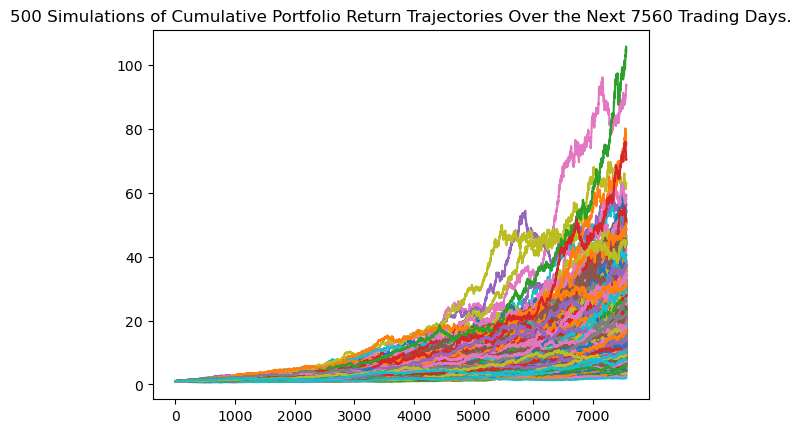

In [30]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation() 

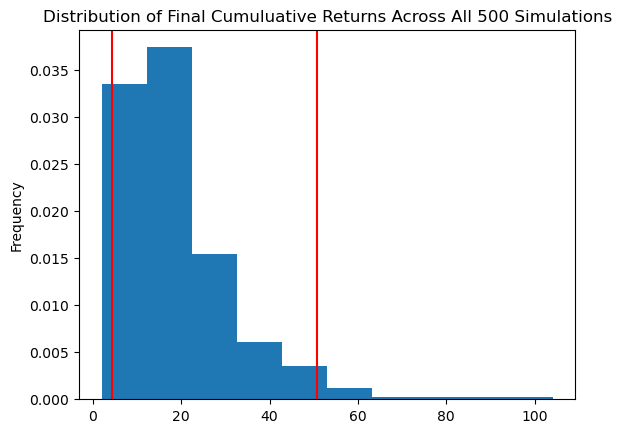

In [31]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             18.853215
std              12.684200
min               1.980572
25%              10.268216
50%              15.371169
75%              23.541979
max             104.087610
95% CI Lower      4.257789
95% CI Upper     50.847299
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [33]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $85155.77 and $1016945.97


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [34]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $127733.66 and $1525418.96


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [36]:
# Printing the simulation input data
MC_dist_five.portfolio_data.head()

AGG                                               \
                  open        high         low       close   volume   
Date                                                                  
2016-05-02  110.739998  110.739998  110.519997  110.610001  3553900   
2016-05-03  110.889999  110.949997  110.750000  110.809998  3044900   
2016-05-04  110.910004  110.930000  110.760002  110.860001  2920200   
2016-05-05  110.919998  111.160004  110.800003  111.139999  3008100   
2016-05-06  111.120003  111.120003  110.970001  110.970001  2718500   

                                SPY                                      \
           daily_return        open        high         low       close   
Date                                                                      
2016-05-02          NaN  206.919998  208.179993  206.410004  207.970001   
2016-05-03     0.001808  206.520004  206.800003  205.279999  206.160004   
2016-05-04     0.000451  204.990005  205.850006  204.419998  205.009995   
2016-05-05     0.002526  205.559998  205.979996  204.470001  204.970001   
2016-05-06    -0.001530  204.059998  205.770004  203.880005  205.720001   

                                    
               volume daily_return  
Date                                
2016-05-02   62188000          NaN  
2016-05-03  106422100    -0.008703  
2016-05-04   92243800    -0.005578  
2016-05-05   67619200    -0.000195  
2016-05-06   89315000     0.003659

In [37]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\benis\Documents\Beni\UoT\HW\Unit5\FinTech_BC_Unit5_HW\financial_planning-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997994,1.003417,0.996889,0.996034,1.002980,1.013092,0.996876,1.006900,0.995169,0.995500,...,0.997929,1.013065,1.006731,0.990434,0.997199,0.981821,1.000602,1.011855,1.000846,0.989756
2,0.993146,1.003438,0.990729,0.994358,1.009674,1.012060,1.004331,1.006531,0.985985,0.998286,...,1.006052,1.010677,1.018292,0.993308,0.995895,0.987433,0.995138,1.019993,1.003124,0.987512
3,0.998145,1.003932,1.001219,0.993519,1.023288,1.011345,1.011663,1.016696,0.981388,0.989229,...,1.008172,1.019489,1.017567,0.987816,1.009122,0.975152,0.999419,1.016140,1.012038,0.986455
4,1.008826,0.998091,1.011245,0.992766,1.029766,1.001811,1.014969,1.017831,0.984467,0.995580,...,1.008706,1.030507,1.015971,0.985999,1.011298,0.974524,0.993498,1.025133,1.007452,0.991092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.485041,1.659502,2.490695,1.594376,1.512858,1.863985,1.966358,1.140913,1.067705,2.867664,...,1.599448,1.499079,1.406813,1.900464,1.197735,1.418891,1.537703,1.256726,1.162337,1.349298
1257,1.489607,1.660904,2.499166,1.603700,1.506829,1.851328,1.978882,1.137465,1.072753,2.866245,...,1.595314,1.489149,1.404772,1.922021,1.197017,1.423969,1.531492,1.266217,1.171349,1.352210
1258,1.500371,1.668429,2.470569,1.616755,1.491323,1.868970,1.985135,1.138396,1.064366,2.888213,...,1.575244,1.473791,1.417428,1.939381,1.195205,1.410086,1.533017,1.247617,1.180469,1.357377
1259,1.489206,1.663119,2.461051,1.618483,1.476488,1.887285,1.973705,1.147354,1.072734,2.935513,...,1.553759,1.472558,1.420011,1.942608,1.197400,1.407351,1.515506,1.250586,1.181322,1.349639


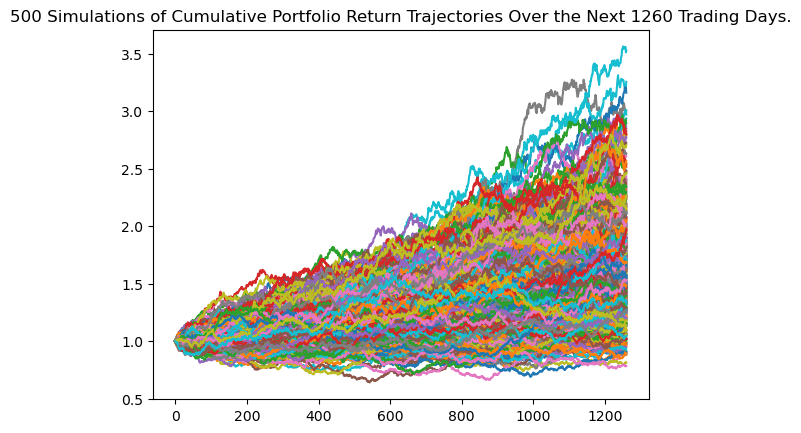

In [38]:
# Plot simulation outcomes
line_plot_five = MC_dist_five.plot_simulation()

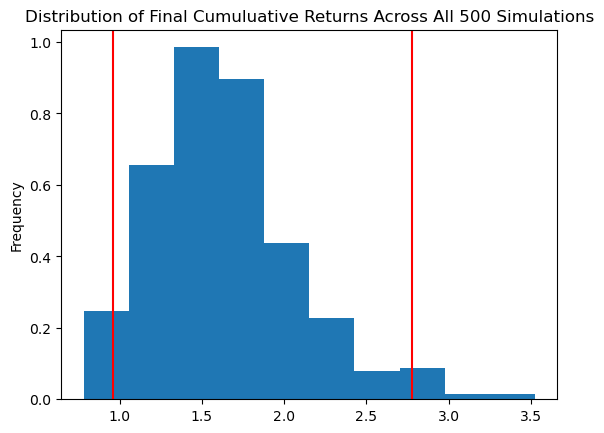

In [39]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_dist_five.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_dist_five.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.635162
std               0.438116
min               0.783348
25%               1.335614
50%               1.569923
75%               1.863927
max               3.523673
95% CI Lower      0.958990
95% CI Upper      2.776607
Name: 1260, dtype: float64


In [41]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*initial_investment,2)
ci_upper_five = round(tbl_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57539.41 and $166596.43


### Ten Years Retirement Option

In [42]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [43]:
# Printing the simulation input data
MC_dist_ten.portfolio_data.head()

AGG                                               \
                  open        high         low       close   volume   
Date                                                                  
2016-05-02  110.739998  110.739998  110.519997  110.610001  3553900   
2016-05-03  110.889999  110.949997  110.750000  110.809998  3044900   
2016-05-04  110.910004  110.930000  110.760002  110.860001  2920200   
2016-05-05  110.919998  111.160004  110.800003  111.139999  3008100   
2016-05-06  111.120003  111.120003  110.970001  110.970001  2718500   

                                SPY                                      \
           daily_return        open        high         low       close   
Date                                                                      
2016-05-02          NaN  206.919998  208.179993  206.410004  207.970001   
2016-05-03     0.001808  206.520004  206.800003  205.279999  206.160004   
2016-05-04     0.000451  204.990005  205.850006  204.419998  205.009995   
2016-05-05     0.002526  205.559998  205.979996  204.470001  204.970001   
2016-05-06    -0.001530  204.059998  205.770004  203.880005  205.720001   

                                    
               volume daily_return  
Date                                
2016-05-02   62188000          NaN  
2016-05-03  106422100    -0.008703  
2016-05-04   92243800    -0.005578  
2016-05-05   67619200    -0.000195  
2016-05-06   89315000     0.003659

In [44]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\benis\Documents\Beni\UoT\HW\Unit5\FinTech_BC_Unit5_HW\financial_planning-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996232,0.992937,1.004849,1.007979,1.010490,1.006278,0.991265,0.998070,1.008757,0.990733,...,1.009834,1.006553,1.010770,1.003690,0.996199,1.003512,0.995450,1.004192,1.002057,1.006803
2,0.999686,0.992246,1.008555,0.995730,1.018429,1.004944,0.985189,0.989784,1.003677,0.994451,...,1.030694,1.017039,1.010070,1.011991,0.997119,1.007429,0.982912,1.003136,1.003223,1.005316
3,1.001917,0.995634,1.016119,0.993494,1.017145,1.011425,0.976085,0.983616,1.000469,0.994699,...,1.043707,1.004729,1.007216,1.011790,1.001631,1.013538,0.978497,1.005876,1.000726,1.000137
4,0.993101,0.995282,1.010148,1.003567,1.014652,1.003403,0.987921,0.979757,0.996900,0.996454,...,1.025621,1.026485,1.006765,0.997926,0.997490,1.022423,0.987638,1.007176,1.004932,1.004641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.326050,2.994153,4.846701,3.353720,1.559235,4.230223,2.666330,3.443044,2.305693,1.935277,...,4.499731,1.728346,3.305341,4.676617,1.758838,1.845941,2.859281,2.102283,2.306937,2.299447
2517,2.336414,2.989361,4.879096,3.376351,1.558903,4.180435,2.686434,3.409519,2.303483,1.949575,...,4.490946,1.757133,3.331017,4.757457,1.760607,1.825406,2.870054,2.102653,2.322228,2.307318
2518,2.340807,2.998108,4.847712,3.360402,1.572505,4.164238,2.686200,3.406021,2.308302,1.939586,...,4.457817,1.765718,3.291718,4.810565,1.749960,1.850188,2.886310,2.098773,2.328591,2.304654
2519,2.336857,3.028580,4.886519,3.380555,1.570619,4.173480,2.696393,3.400603,2.313196,1.938486,...,4.383050,1.774678,3.300729,4.778286,1.767999,1.862217,2.896195,2.101002,2.318981,2.298555


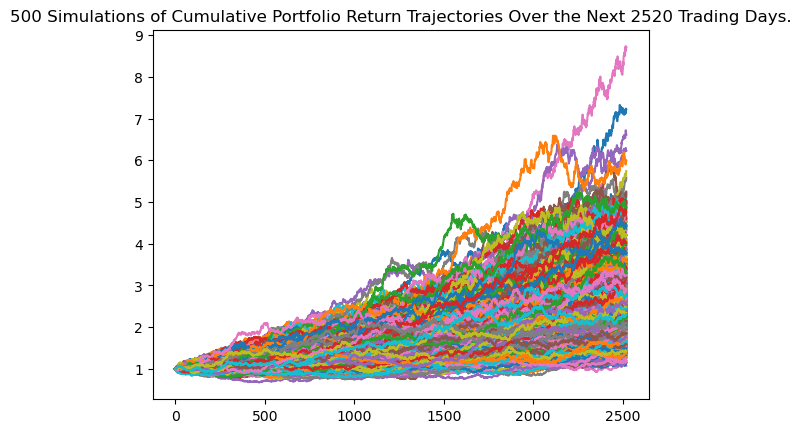

In [45]:
# Plot simulation outcomes
line_plot_ten = MC_dist_ten.plot_simulation()

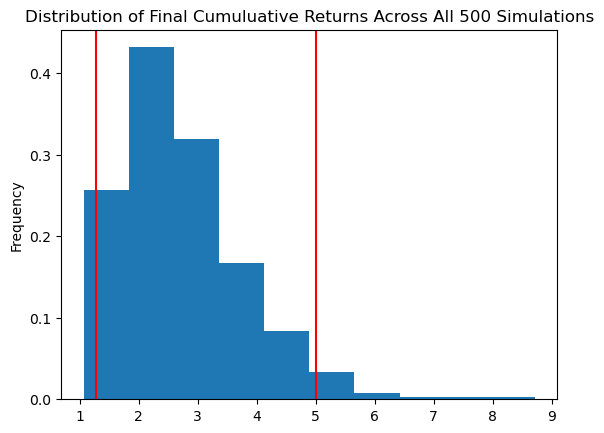

In [46]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_dist_ten.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.720986
std               1.049215
min               1.073259
25%               1.966267
50%               2.526478
75%               3.283376
max               8.716212
95% CI Lower      1.278472
95% CI Upper      5.002974
Name: 2520, dtype: float64


In [48]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $76708.34 and $300178.46
